In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import datasets

In [27]:
X = 2*np.random.randn(100, 1)
y = 4+3*X+np.random.randn(100, 1)

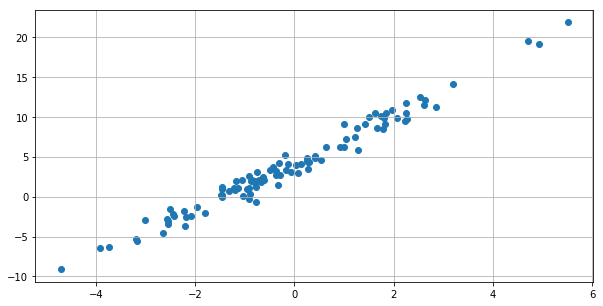

In [28]:
plt.scatter(X, y)
plt.rcParams['figure.figsize'] = (10, 10)
plt.grid()
plt.show()

## Linear regression using normal equation

Closed form equation
$$\theta=(X_TX)^{-1}X_Ty$$

In [29]:
X_b=np.hstack((np.ones((100,1)),X))
theta= np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)
y_predicted=X_b.dot(theta)

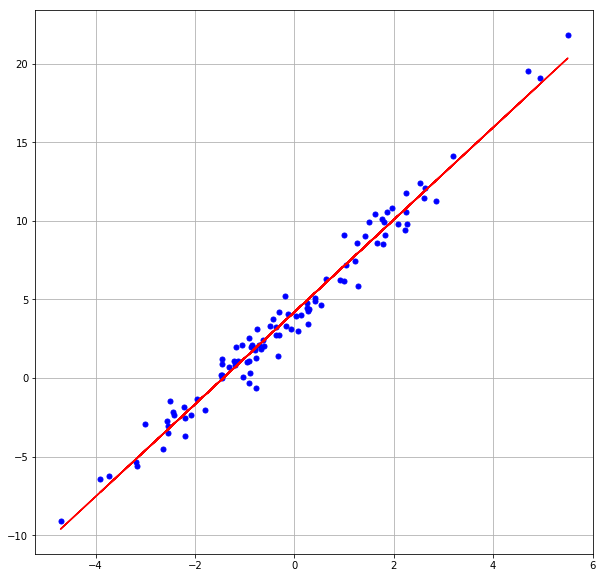

In [30]:
# Plot actual and predicted values
plt.plot(X,y,'b.',markersize=10)
plt.plot(X,y_predicted,'r-')
plt.grid()
plt.show()

## Linear regression using scikit-learn

In [6]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print('Intercept: ', lin_reg.intercept_)
print('Coeff: ',lin_reg.coef_)

Intercept:  [4.06009323]
Coeff:  [[2.95380398]]


In [8]:
y_predicted=lin_reg.predict(X)

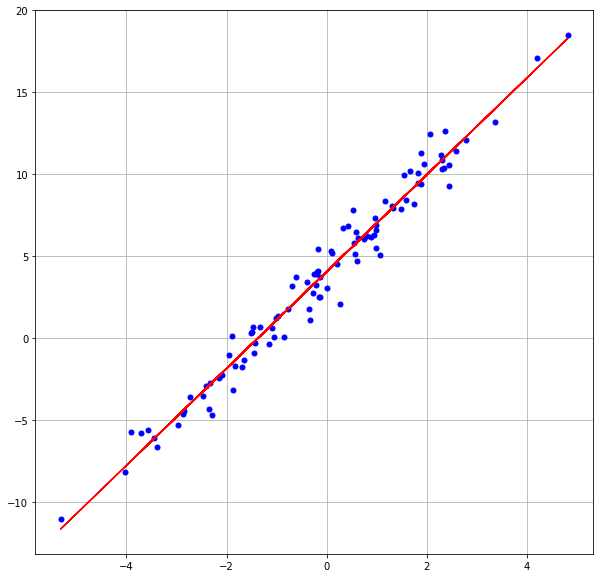

In [9]:
plt.plot(X,y,'b.',markersize=10)
plt.plot(X,y_predicted,'r-')
plt.grid()
plt.show()

## Implementing batch gradient descent

Shapes:
- $X(m,n)$
- $y(m,1)$
- $\theta(n,1)$

Batch gradient descent equation
$$\nabla_\theta MSE(\theta)=\frac{2}{m}X^T(X\theta-y)$$

In [10]:
learning_rate=0.1
m=100
n_iterations=1000

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=(2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-learning_rate*gradients
    
print("Theta: ")
print(theta)

Theta: 
[[4.06009323]
 [2.95380398]]


## Implementing stochastic gradient descent

In [35]:
n_epoch = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters
m = 100


def learning_schedule(t):
    return t0/(t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epoch):

    # To make sure that all training examples are used in training
    random_indices = np.random.permutation(m)
    for i in range(m):
        random_index = random_indices[i]

        # Train a single training example at a time
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)

        learning_rate = learning_schedule(epoch*m+i)
        theta = theta-learning_rate*gradients


print("Theta: ")
print(theta)

Theta: 
[[4.19753793]
 [2.93363238]]


## Stochastic gradient descent using scikit-learn

In [33]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1,tol=-np.infty,random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [34]:
print('Intercept: ', sgd_reg.intercept_)
print('Coeff: ', sgd_reg.coef_)

Intercept:  [4.20866088]
Coeff:  [3.01761838]


## Mini-batch gradient descent

In [36]:
X_b.shape

(100, 2)

In [37]:
y.shape

(100, 1)

In [39]:
num_iterations=50
minibatch_size = 20

theta = np.random.randn(2,1)

t0,t1=200,1000
def learning_schedule(t):
    return t0/(t+t1)

t=0
for iteration in range(num_iterations):
    
    # Randomly shuffle X_b and y
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # Run grdaient descent for each minibatch
    for minibatch_index in range(0,m,minibatch_size):
        t+=1
        X_minibatch = X_b_shuffled[minibatch_index:minibatch_index+minibatch_size]
        y_minibatch = y_shuffled[minibatch_index:minibatch_index+minibatch_size]
        
        gradients = (2/minibatch_size)*np.dot(X_minibatch.T,np.dot(X_minibatch,theta)-y_minibatch)
        learning_rate = learning_schedule(t)
        theta = theta - learning_rate*gradients

In [40]:
theta

array([[4.17205119],
       [3.00152952]])

## Polynomial regression

In [14]:
m = 100
X = 6*np.random.rand(m, 1)-2
y = 0.5*X**2+X+2+np.random.randn(m, 1)

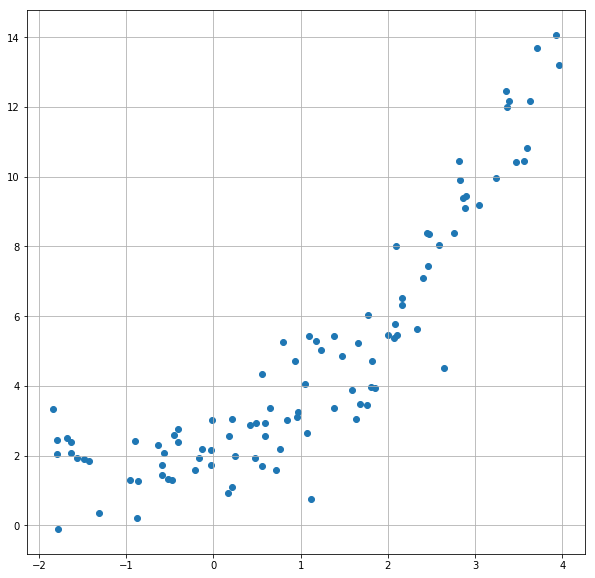

In [15]:
plt.scatter(X, y)
plt.grid()
plt.show()

In [16]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [17]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
print('Intercept: ',lin_reg.intercept_)
print('Coefficient: ',lin_reg.coef_)

Intercept:  [1.97218329]
Coefficient:  [[0.86097122 0.53642542]]


In [18]:
C2=lin_reg.coef_[0][1]
C1=lin_reg.coef_[0][0]
C0=lin_reg.intercept_[0]
y_predicted=C2*X**2+C1*X+C0

print('C2: ',C2)
print('C1: ',C1)
print('C0: ',C0)

C2:  0.5364254178993978
C1:  0.8609712180304245
C0:  1.9721832903602428


In [19]:
X.shape

(100, 1)

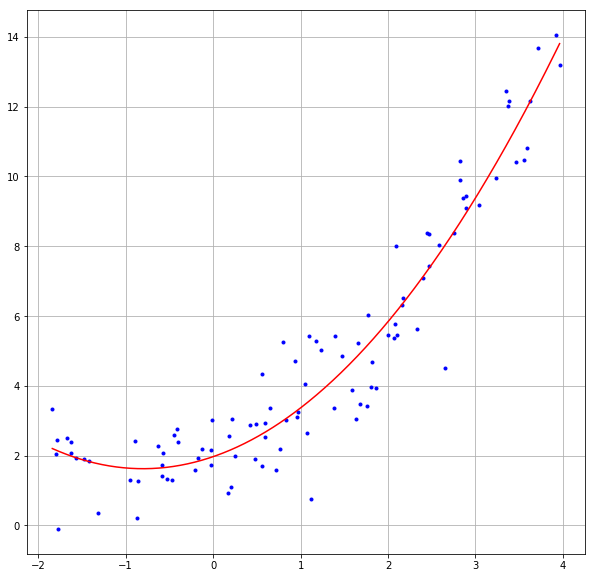

In [20]:
plt.plot(X,y,'b.')
X_new = np.linspace(X.min(),X.max(),num=500)
y_new= C2*X_new**2+C1*X_new+C0
plt.plot(X_new,y_new,'r-',markersize=15)
plt.grid()
plt.show()

## Learning curves
These are plots of the model’s performance on the training set and the validation set as a function of the training set size.

In [52]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,validation_errors=[],[]
    
    # Train model with different training set size and calculate errors on training and validation set
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        validation_errors.append(mean_squared_error(y_val,y_val_predict))
        
    return (train_errors,validation_errors)

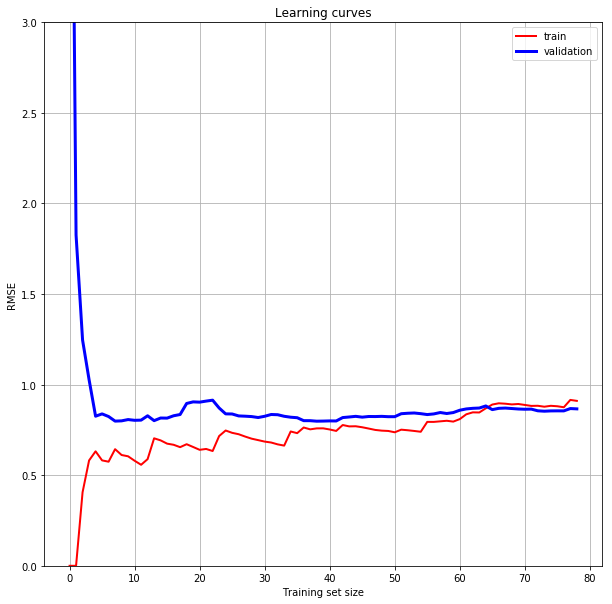

In [53]:
lin_reg = LinearRegression()
train_errors, validation_errors = plot_learning_curves(lin_reg, X, y)

# Plot learning curves
plt.plot(np.sqrt(train_errors),
         'r-', linewidth=2, label='train')
plt.plot(np.sqrt(validation_errors),
         'b-', linewidth=3, label='validation')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curves')
plt.ylim([0,3])
plt.grid()
plt.show()

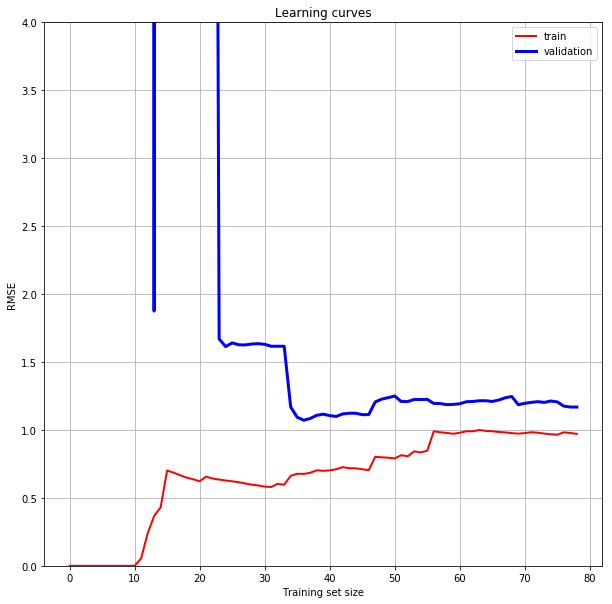

In [23]:
polynomial_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
train_errors, validation_errors = plot_learning_curves(polynomial_reg, X, y)
# Plot learning curves
plt.plot(np.sqrt(train_errors),
         'r-', linewidth=2, label='train')
plt.plot(np.sqrt(validation_errors),
         'b-', linewidth=3, label='validation')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curves')
plt.grid()
axes=plt.gca()
axes.set_ylim(0,4)
plt.show()

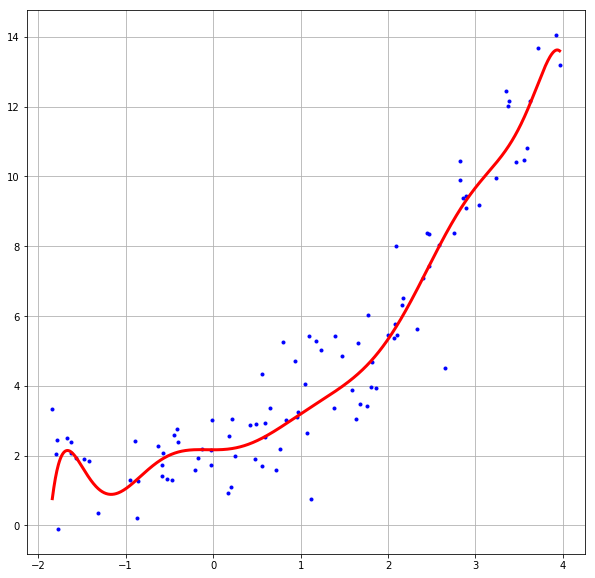

In [24]:
plt.plot(X, y, 'b.')
X_pred = np.linspace(X.min(), X.max(), 1000)
y_pred = polynomial_reg.predict(X_pred.reshape(-1, 1))
plt.plot(X_pred, y_pred, 'r-', linewidth=3)
plt.grid()
plt.show()

## Regularized linear models

### Ridge regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression. A regularization term equal to  $\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$  is added to the cost function.
Ridge regression cost function:
$$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$$

### Lasso regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm of the weight vector instead of half the square of the $l_2$ norm. Lasso regression cost function:
$$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$$

### Elastic net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.
Elastic Net cost function:
$$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^{n}|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$$

### Early stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

## Logistic regression

Logistic regression model estimated probability
$$\hat{p}=h_\theta(x)=\sigma(\theta_Tx)$$
The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.
$$\sigma(t)=\frac{1}{1+e^{-t}}$$

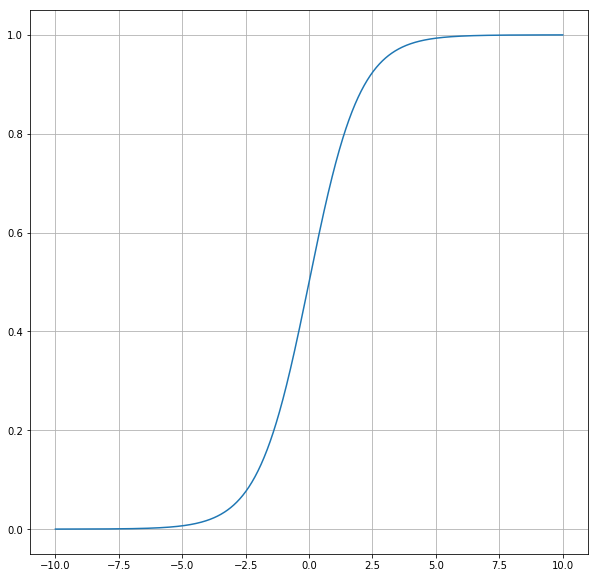

In [25]:
x=np.linspace(-10,10,1000)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.rcParams['figure.figsize'] = (10, 5)
plt.grid()
plt.show()

### Cost function for single training instance

\begin{equation}
  c(\theta)=\begin{cases}
    -log(p), & \text{if $y=1$}.\\
    -log(1-p), & \text{if $y=0$}.
  \end{cases}
\end{equation}

This cost function makes sense because – log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

### Logistic regression cost function

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(p^{(i)})+(1-y^{(i)})log(1-p^{(i)})]$$

In [4]:
iris = datasets.load_iris()

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
X = iris['data']
y=iris['target']

## Binary classification

In [13]:
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.int)

In [14]:
X.shape

(150, 2)

In [15]:
y.shape

(150,)

In [16]:
logistic_reg_clf = LogisticRegression(solver='liblinear',C=10**10,random_state=42)
logistic_reg_clf.fit(X,y)
y_prob = logistic_reg_clf.predict(X)
y_prob

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Softmax regression

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.

#### Softmax score for class k
$$s_k(x)=(\theta^k)^Tx$$

#### Softmax function
$$p_k=\frac{exp(s_k(x))}{\sum_{j=1}^Kexp(s_j(x))}$$

#### Prediction
$y^{pred} = argmax s_k(x)$

#### Cross entropy loss function

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{j=1}^Ky_k^{(i)}log(p_k^{(i)})$$